In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import datetime

from dsmanipulator import dsanalyzer as dsa
from dsmanipulator import dsloader as dsl
from dsmanipulator import dscreator as dsc
from dsmanipulator.dataobjects import FileColumnNames

from matplotlib.axes import Axes
from dsmanipulator.dataobjects import Direction, FileColumnNames, Station
from bidict import bidict
from matplotlib.dates import DateFormatter, AutoDateLocator

In [2]:
fcn = FileColumnNames("TimeStamp", "Relative Time", "srcIP", "dstIP", "srcPort", "dstPort")

filename = "../data/connection-loss.csv"

dialect = dsl.detect_dialect(filename)
df = dsl.load_data(
    filename,
    data_types={
        "TimeStamp": "datetime",
        "Relative Time": "float",
        "srcIP": "object",
        "dstIP": "object",
        "srcPort": "float",
        "dstPort": "float",
        "ipLen": "float",
        "len": "float",
        "fmt": "object",
        "uType": "object",
        "asduType": "float",
        "numix": "float",
        "cot": "float",
        "oa": "float",
        "addr": "float",
        "ioa": "object",
    },
    dialect=dialect,
    row_limit=None,
)

# print(df.columns)

dsc.add_relative_days(df, fcn, inplace=True)
station_ids = dsc.create_station_ids(df, fcn)
dsc.add_station_id(df, fcn, station_ids, inplace=True)
pair_ids = dsc.create_pair_ids(df, fcn)
dsc.add_pair_id(df, fcn, pair_ids, inplace=True)
direction_ids = dsc.create_direction_ids(df, fcn)
dsc.add_direction_id(df, fcn, direction_ids, inplace=True)

,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,...,numix,cot,oa,addr,ioa,*Relative Day##,*Source station id##,*Destination station id##,*Pair id##,*Direction id##
0,2022-05-07 14:41:44.980,7.988096,192.168.11.111,192.168.11.248,61254.0,2404.0,46.0,4.0,0x00000003,0x00000001,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
1,2022-05-07 14:41:44.980,7.988457,192.168.11.248,192.168.11.111,2404.0,61254.0,46.0,4.0,0x00000003,0x00000002,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
2,2022-05-07 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404.0,61254.0,90.0,21.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,67,0,1,0,0,0
3,2022-05-07 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404.0,61254.0,90.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,0,1,0,0,0
4,2022-05-07 14:41:48.470,11.477121,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57858,2022-05-10 10:36:32.950,244495.958036,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0
57859,2022-05-10 10:36:34.970,244497.977239,192.168.11.111,192.168.11.248,61254.0,2404.0,46.0,4.0,0x00000001,NaN,...,NaN,NaN,NaN,NaN,NaN,3,0,1,0,1
57860,2022-05-10 10:36:35.750,244498.756241,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0
57861,2022-05-10 10:36:43.550,244506.557115,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0


In [3]:
station_ids

bidict({0: Station(ip='192.168.11.111', port=61254.0), 1: Station(ip='192.168.11.248', port=2404.0)})

[]

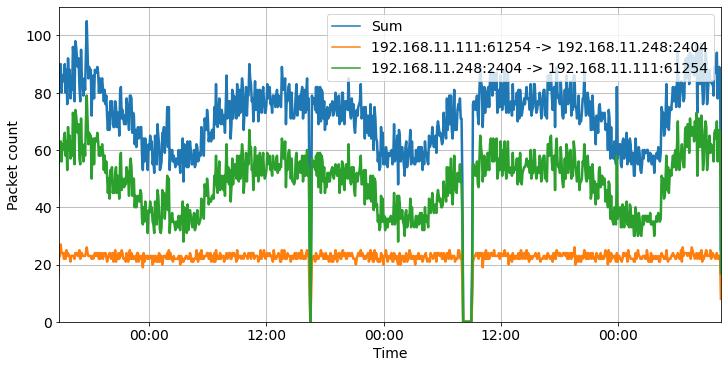

In [17]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(1,1,figsize=(10, 5),constrained_layout = True)


start = df[fcn.timestamp].iloc[0]
end = df[fcn.timestamp].iloc[-1]

ax.set_xlim([start, end])
ax.set_ylim(0,110)


delta = datetime.timedelta(minutes=5)


dsa.plot_pair_flow(
    df, fcn, ax, 0, station_ids, direction_ids, delta
)

# dsa.plot_slaves(df, fcn, ax, delta, 1, station_ids, pair_ids)

plt.savefig('pgf/conn_loss_pair.pgf')
plt.plot()
